In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [15]:
#Read the train data
rosman_train_data = pd.read_csv("../data/train.csv")

/Users/sara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
rosman_train_data.head(3)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [17]:
rosman_train_data.tail(3)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
637771,2014-07-31,754.0,4.0,10564.0,1162.0,1.0,1.0,0,NaN
637772,2014-07-31,755.0,4.0,12302.0,1020.0,1.0,1.0,0,1.0
637773,2014-07-31,751.0,4.0,3913.0,539.0,1.0,1.0,0,1.0


In [18]:
#Read the store data
rosman_store_data = pd.read_csv("../data/store.csv")

In [19]:
rosman_store_data.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [20]:
rosman_train_data.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [21]:
rosman_store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [22]:
#Check if there are nulls in train data
rosman_train_data.isnull().any().any()

True

In [23]:
#Check if there are nulls in store data
rosman_store_data.isnull().any().any()

True

In [24]:
#Check which columns of train data have null values
rosman_train_data.isnull().any()

Date             False
Store             True
DayOfWeek         True
Sales             True
Customers         True
Open              True
Promo             True
StateHoliday      True
SchoolHoliday     True
dtype: bool

In [25]:
#Check which columns of store data have null values
rosman_store_data.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [26]:
#Merge the train data with store data
rosman_df = rosman_train_data.merge(rosman_store_data, how='left', on='Store')

In [27]:
rosman_df.head(3)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,a,6630.0,NaN,NaN,0.0,NaN,NaN,NaN
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,c,2140.0,8.0,2012.0,0.0,NaN,NaN,NaN


In [28]:
#Remove the null targets (i.e. Sales)
null_Sales = rosman_df[rosman_df['Sales'].isnull()]
rosman_df_new = rosman_df[~rosman_df.index.isin(null_Sales.index)]

In [29]:
rosman_df_new.isnull().any()

Date                         False
Store                         True
DayOfWeek                     True
Sales                        False
Customers                     True
Open                          True
Promo                         True
StateHoliday                  True
SchoolHoliday                 True
StoreType                     True
Assortment                    True
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                        True
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [30]:
#Remove th Cusomers column
rosman_df_new = rosman_df_new.drop('Customers', axis=1)

In [31]:
rosman_df_new.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [32]:
rosman_df_new.shape

(618747, 17)

In [33]:
rosman_df_new.loc[:, 'Store'].nunique()

1115

In [34]:
rosman_df_new.loc[:, 'DayOfWeek'].nunique()

7

In [35]:
rosman_df_new.loc[:, 'DayOfWeek'].unique()

array([ 2., nan,  3.,  4.,  5.,  6.,  7.,  1.])

In [36]:
rosman_df_new.loc[:, 'Open'].nunique()

2

In [37]:
rosman_df_new.loc[:, 'Open'].unique()

array([ 0.,  1., nan])

In [34]:
rosman_df_new.loc[:, 'Promo'].nunique()

2

In [35]:
rosman_df_new.loc[:, 'Promo'].unique()

array([ 0., nan,  1.])

In [36]:
rosman_df_new.loc[:, 'StateHoliday'].unique()

array(['a', nan, '0', 'b', 'c', 0.0], dtype=object)

In [37]:
rosman_df_new.loc[:, 'SchoolHoliday'].unique()

array([ 1., nan,  0.])

In [38]:
rosman_df_new.loc[:, 'StoreType'].unique()

array(['d', 'a', 'c', 'b', nan], dtype=object)

<AxesSubplot:>

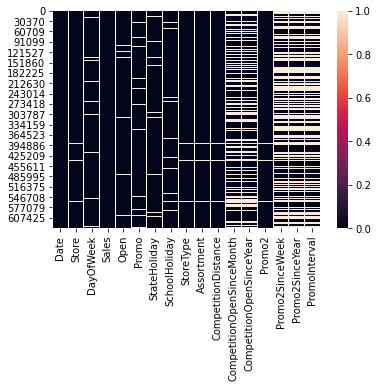

In [40]:
#Check the null values using heatmap
nulls = rosman_df_new.isnull()
sns.heatmap(nulls)

In [60]:
#Remove nulls from the columns listed below
for column in ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
               'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2']:
    all_nulls = rosman_df_new[rosman_df_new[column].isnull()]
    rosman_df_new = rosman_df_new[~rosman_df_new.index.isin(all_nulls.index)]

In [61]:
rosman_df_new.shape

(513483, 17)

In [62]:
rosman_df_new.isnull().any()

Date                         False
Store                        False
DayOfWeek                    False
Sales                        False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

<AxesSubplot:>

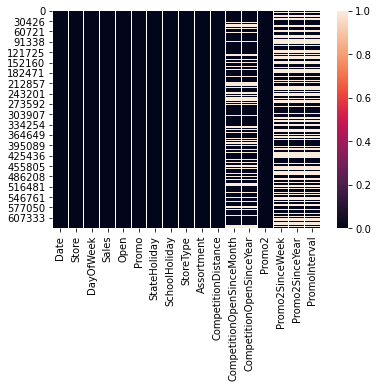

In [63]:
nullies = rosman_df_new.isnull()
sns.heatmap(nullies)

In [64]:
rosman_df_new.shape

(513483, 17)

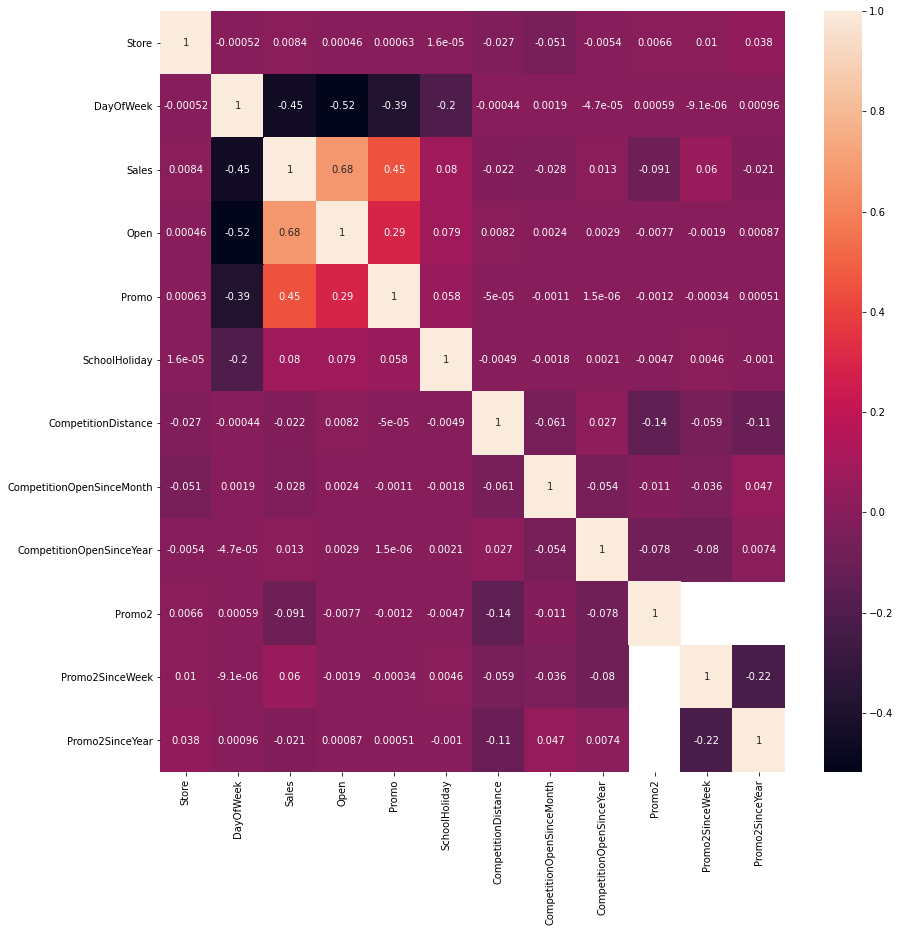

In [75]:
#Check the correlations
corrMatrix = rosman_df_new.corr()
fig = plt.figure(figsize=(14,14))
sns.heatmap(corrMatrix, annot=True)
plt.show()